In [1]:
from nn import MLP
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.neural_network import MLPRegressor

/home/sina/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
random.seed(42)
np.random.seed(42)

In [3]:
x = np.array(np.linspace(0, 6, 20))
y = [e**2 for e in x]
xs = x.reshape(-1, 1)

In [4]:
#nn = MLP([(1, 16), (16, 32), (32, 16), (16, 1)], activation='tanh')
nn = MLP([(1, 32), (32, 64), (64, 64), (64, 32), (32, 16), (16, 1)], activation='tanh')

nit = 500
eta = 0.01
y_hat = None
idxs = np.random.choice(np.arange(0, len(xs)), nit)
for i in range(nit):
    #y_hat = [nn(x) for x in xs]
    #loss = sum((y_h - y_t) ** 2 for y_h, y_t in zip(y_hat, y))/len(x)
    y_hat = nn(xs[idxs[i]])
    loss = (y_hat - y[idxs[i]])** 2/len(x)
    nn.zero_grad()
    loss.backward()
    
    if i%10 == 0:
        print(f"iter {i}: loss {loss.data}")

    for p in nn.parameters():
        p.data -= eta * p.grad

iter 0: loss 0.7044224742289581
iter 10: loss 0.2549668994593019
iter 20: loss 0.011910301473949926
iter 30: loss 1.3127739263972809
iter 40: loss 3.6123287298278117
iter 50: loss 0.03341013915179342
iter 60: loss 9.108531811807369e-05
iter 70: loss 2.1581206821917323
iter 80: loss 2.530178651875181
iter 90: loss 0.003102544982326602
iter 100: loss 0.033417789257333706
iter 110: loss 0.2508668849111951
iter 120: loss 0.0347254108491133
iter 130: loss 2.65114017076824
iter 140: loss 0.9436369633819045
iter 150: loss 0.15747987293644997
iter 160: loss 6.555683823679563
iter 170: loss 11.703173288922244
iter 180: loss 4.141583969694844
iter 190: loss 5.99350686308142
iter 200: loss 0.1930401293415356
iter 210: loss 5.0483198528900735
iter 220: loss 4.601494238830777
iter 230: loss 13.822994789512121
iter 240: loss 0.8579764484585515
iter 250: loss 6.0194810500973614e-05
iter 260: loss 15.533335897089954
iter 270: loss 1.8294153044839245
iter 280: loss 0.4006716193310109
iter 290: loss 7.9

In [5]:
nn_pred = [nn(d).data for d in xs]

In [6]:
rgr = MLPRegressor(hidden_layer_sizes=(32, 64, 32, 16), max_iter=500, solver='sgd', activation='tanh')
rgr.fit(xs, y)
y_pred = rgr.predict(xs)

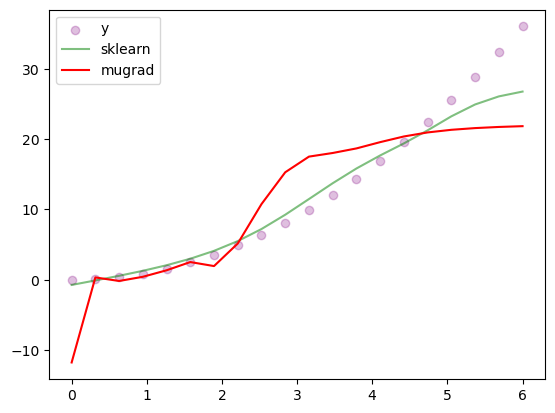

In [7]:
plt.scatter(xs, y, c='purple', alpha=0.25, label='y')
plt.plot(xs, y_pred, c='green', alpha=0.5, label='sklearn')
plt.plot(xs, nn_pred, c='red', label='mugrad')
plt.legend()